In [90]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
############################reference: gemini eval :(rushikesh)############################################

In [91]:
def plot_conf_mat(ytrue,ypred,title):
    cm = confusion_matrix(ytrue,ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Composite','Prime'])
    disp.plot()
    plt.title(title)

def plot_acc_vs_number(responses_array, primes, composites, title):
    #responses_array is of the form [[num, response], [num, response], ...]
    #primes is a set of prime numbers
    #composites is a set of composite numbers

    #we will plot the accuracy of the model as a function of the number of digits in the number
    max_num = max([num for num, _ in responses_array])

    correct = np.zeros((max_num))
    total = np.zeros((max_num))

    for response in responses_array:
        
        num = response[0]
        resp = response[1]

        if num not in primes and num not in composites: #model returned a response for a number that we did not even ask it to classify. So we will skip this.
            continue

        if num in primes and resp == 1:
            correct[num-1] += 1
        
        elif num in composites and resp == 0:
            correct[num-1] += 1
        
        total[num-1] += 1
    
    for i in range(0, len(total), 5000):
        #do a sum of total and correct for every 5000 numbers
        total_sum = np.sum(total[i:i+5000])
        correct_sum = np.sum(correct[i:i+5000])
        if total_sum == 0:
            continue

    #create 20 bins of equal size
    bins = np.linspace(0, 10**5, 21, dtype=int) #we have numbers upto 100000

    acc = np.zeros((20))

    for i in range(20):
        correct_sum = np.sum(correct[bins[i]:bins[i+1]])
        total_sum = np.sum(total[bins[i]:bins[i+1]])
        acc[i] = correct_sum * 100/total_sum
    
    #make a bar plot
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, 21), acc, tick_label=[f"{bins[i]}-{bins[i+1]}" for i in range(20)], color='orange')
    plt.xlabel("Number")
    plt.ylabel("Accuracy (%)")
    plt.title(title)
    plt.xticks(range(1, 21), rotation=45)
    plt.grid()

In [92]:
# read in the primality test data
with open("primality_test.json","r") as file:
    test_data = json.load(file)

primes = set(test_data['primes'])
composites = set(test_data['composites'])

In [93]:
def extract_file(file_name):
    file_responses = []
    print(file_name)

    with open(file_name,"r") as file:
        for line in file:
            line_ = line.strip()
            # format is 4=Yes
            #print(line_)
            parts = line_.split("=")
            num = parts[0]
            resp = parts[-1]
            num = int(num)
            resp = resp.strip()
            if resp == "Yes" or resp == "yes":
                resp = 1
            else:
                resp = 0
            file_responses.append((num,resp))

    return file_responses


In [94]:
is_prime_responses = []

is_prime_file_names=['prime_test_prime.txt','prime_test_composites.txt']

for file_name in is_prime_file_names:
    is_prime_responses.extend(extract_file(file_name))


print('total responses:',len(is_prime_responses))


prime_test_prime.txt
prime_test_composites.txt
total responses: 10000


In [95]:
y_true_prime = []
y_pred_prime = []

for num,resp in is_prime_responses:
    if num in primes:
        y_true_prime.append(1)
    elif num in composites:
        y_true_prime.append(0)
    else:
        print(f"Number {num} not found in primes or composites")
        continue
    y_pred_prime.append(resp)

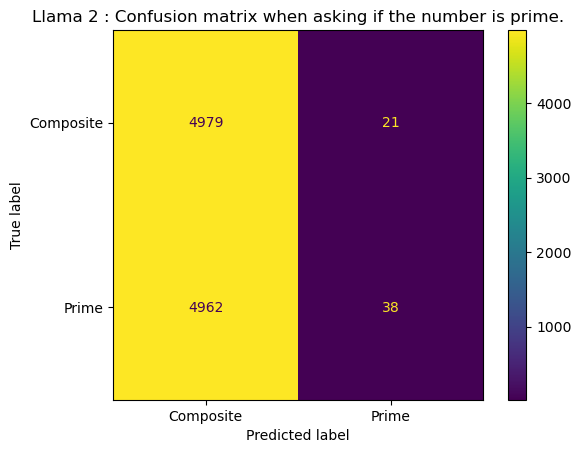

In [96]:
plot_conf_mat(y_true_prime,y_pred_prime,"Llama 2 : Confusion matrix when asking if the number is prime.")

In [97]:
is_composite_responses = []

is_composite_file_names=['composite_test_prime.txt','composite_test_composites.txt']

for file_name in is_composite_file_names:
    is_composite_responses.extend(extract_file(file_name))


print('total responses:',len(is_composite_responses))

composite_test_prime.txt
composite_test_composites.txt
total responses: 10000


In [98]:
y_true_composite = []
y_pred_composite = []

for num,resp in is_composite_responses:
    if num in primes:
        y_true_composite.append(1)
    elif num in composites:
        y_true_composite.append(0)
    else:
        print(f"Number {num} not found in primes or composites")
        continue
    y_pred_composite.append(resp)

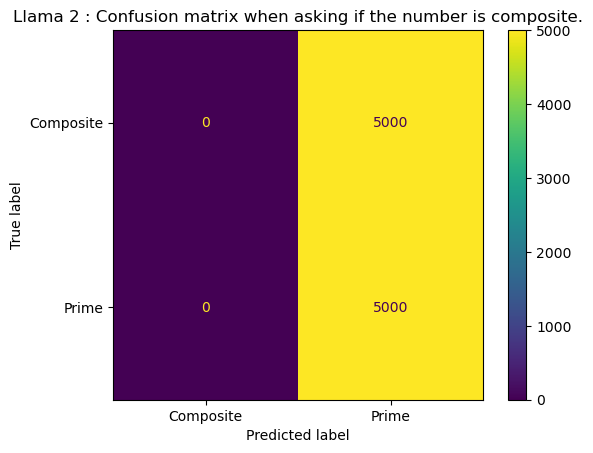

In [99]:

plot_conf_mat(y_true_composite,y_pred_composite,"Llama 2 : Confusion matrix when asking if the number is composite.")

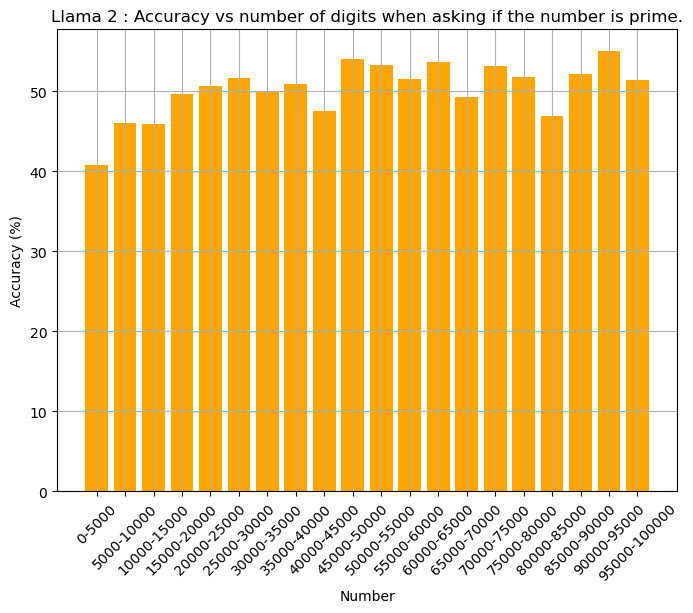

In [100]:
plot_acc_vs_number(is_prime_responses, primes, composites, "Llama 2 : Accuracy vs number of digits when asking if the number is prime.")

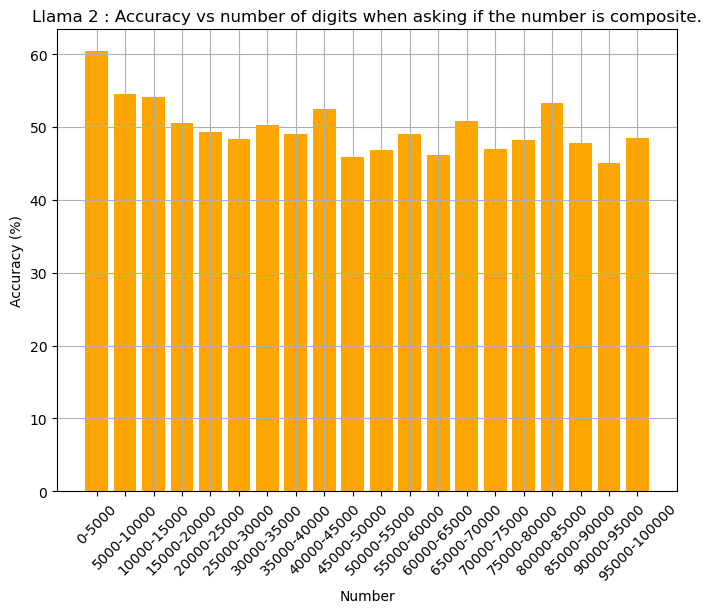

In [101]:
plot_acc_vs_number(is_composite_responses, primes, composites, "Llama 2 : Accuracy vs number of digits when asking if the number is composite.")